In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("economic_index.csv")
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [5]:
# droping unwanted columns
df.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [6]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [7]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

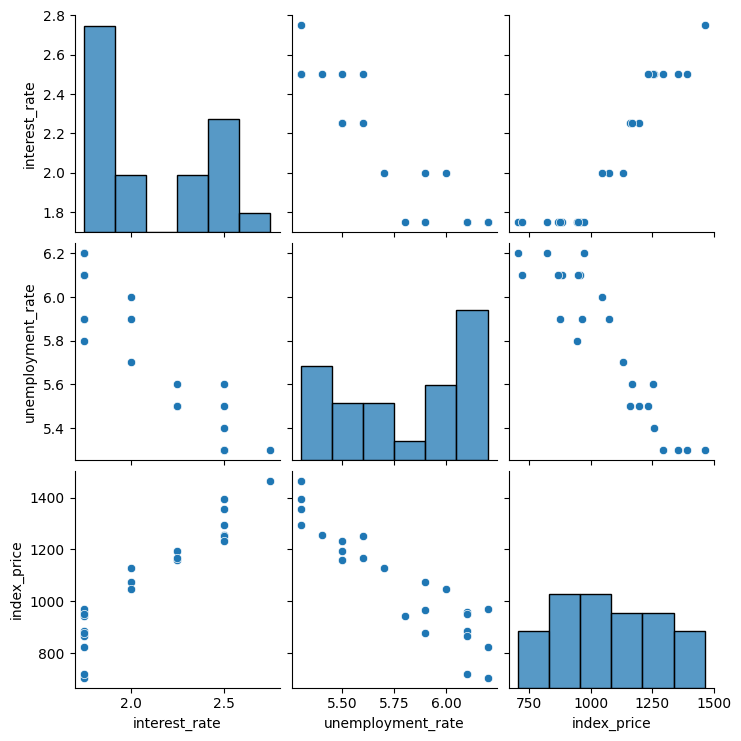

In [8]:
# visualization
import seaborn as sns
sns.pairplot(df)

In [9]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment rate')

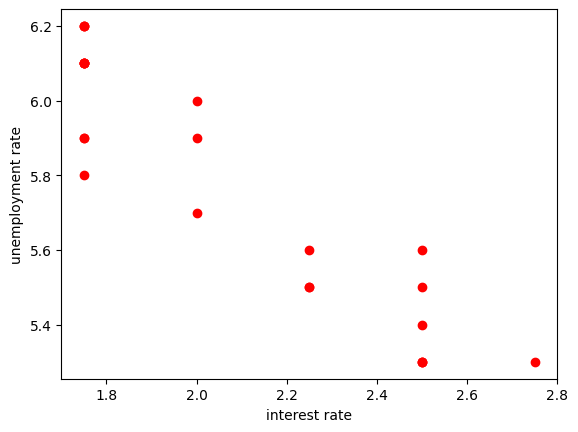

In [12]:
# visualizing data point more closely
plt.scatter(df["interest_rate"],df["unemployment_rate"],color='r')
plt.xlabel("interest rate")
plt.ylabel("unemployment rate")

Text(0, 0.5, 'index price')

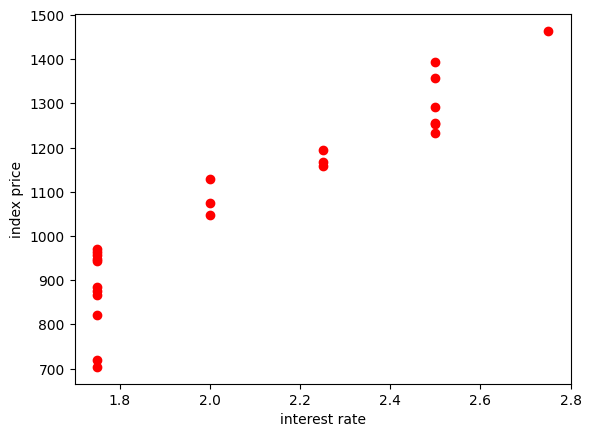

In [13]:
# visualizing data point more closely
plt.scatter(df["interest_rate"],df["index_price"],color='r')
plt.xlabel("interest rate")
plt.ylabel("index price")

Text(0.5, 0, 'index price')

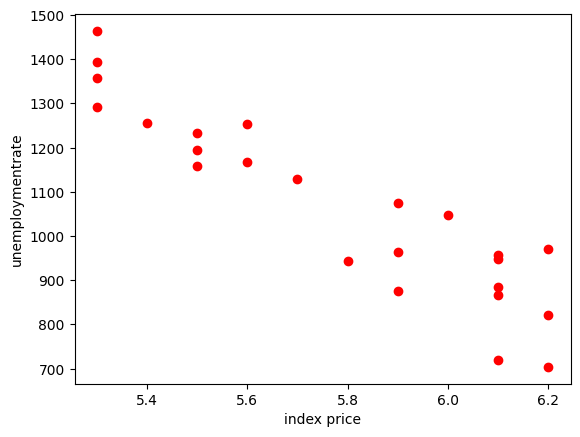

In [14]:
# visualizing data point more closely
plt.scatter(df["unemployment_rate"],df["index_price"],color='r')
plt.ylabel("unemploymentrate")
plt.xlabel("index price")

In [16]:
# independent feature
x = df[["interest_rate","unemployment_rate"]] #method one 
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [21]:
x.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [22]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [23]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

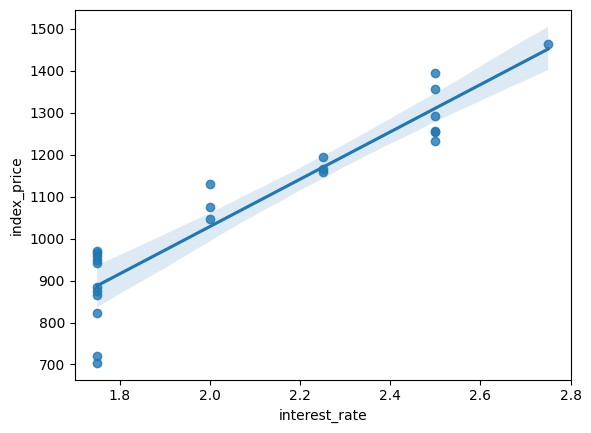

In [26]:
sns.regplot(x=df["interest_rate"],y=df["index_price"])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

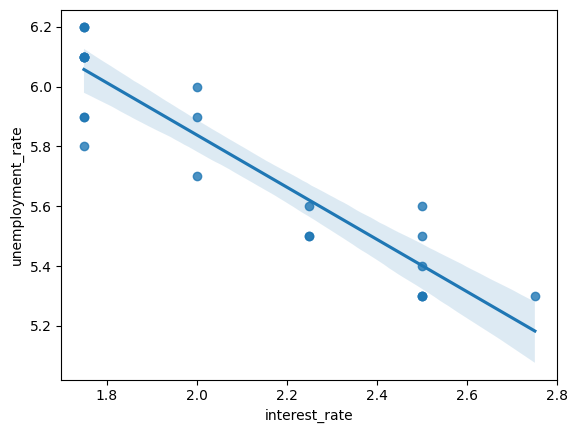

In [27]:
sns.regplot(x=df["interest_rate"],y=df["unemployment_rate"])

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

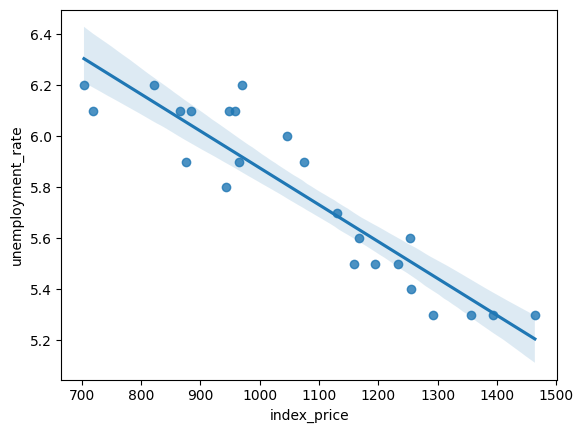

In [28]:
sns.regplot(x=df["index_price"],y=df["unemployment_rate"])

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [31]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [32]:
x_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [33]:
x_test

array([[ 0.36115756, -0.82078268],
       [-1.08347268,  1.33377186],
       [ 1.8057878 , -1.43636969],
       [-1.08347268,  1.02597835],
       [-0.36115756,  0.41039134],
       [ 0.36115756, -0.51298918]])

In [34]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [39]:
# cross validations
from sklearn.model_selection import cross_val_score
validation = cross_val_score(regression,x_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [40]:
np.mean(validation)

-5914.828180162386

In [44]:
y_pred = regression.predict(x_test)
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [48]:
### performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306604
73.80444932337097
90.04758423359621


### R square
#### Formula
**R^2 = 1 - SSR/SST**
#### R^2=coefficient of determination
#### SSR=sum of squares of residuals
#### SST=total sum of squares

In [49]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(score)

0.7591371539010257


**Adjusted R2 = 1 - [(1-R2)*(n-1)/()n-k-1]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [50]:
### display adjusted R-Squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.5985619231683761

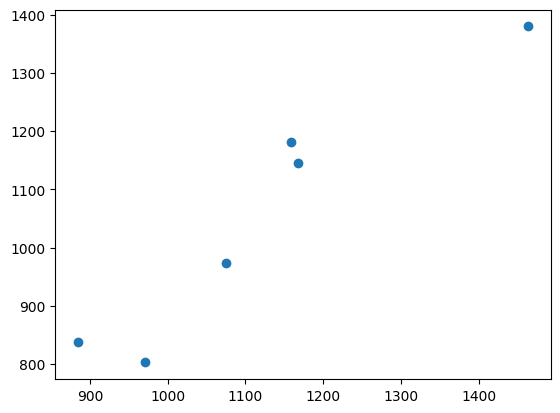

In [51]:
# Assumptions
plt.scatter(y_test,y_pred)

In [52]:
residuals = y_test-y_pred
residuals

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64

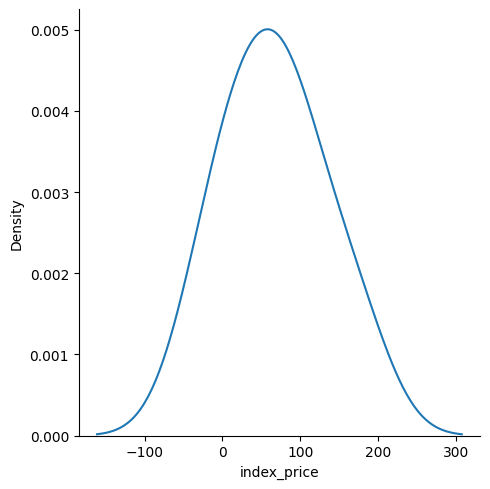

In [53]:
sns.displot(residuals,kind="kde")

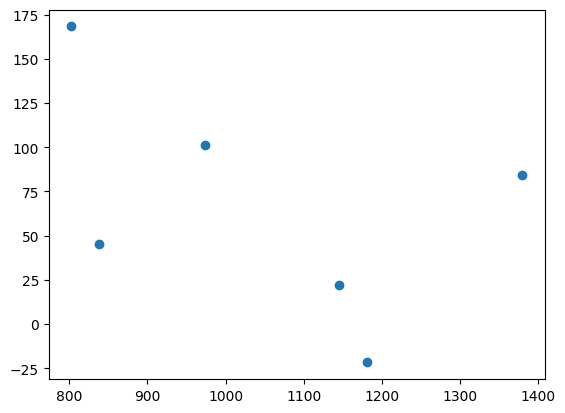

In [54]:
plt.scatter(y_pred,residuals)

In [55]:
import statsmodels.api as sm
model = sm.OLS(y_train,x_train).fit()
prediction = model.predict(x_test)
print(prediction)

[ 127.30223686 -250.70164745  326.390126   -214.91844842  -79.59130481
   91.51903783]


In [57]:
model.summary()

/home/panda/Downloads/yes/envs/intern/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Mon, 12 Aug 2024   Prob (F-statistic):                       0.754
Time:                        12:59:57   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
print(regression.coef_)

[  88.27275507 -116.25716066]
